In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
with open("extracted-examples.json", "r") as file:
    examples = json.load(file)
examples[0]

{'repo_index': 3,
 'file_path': 'conversions/binary_to_hexadecimal.py',
 'functions': {'bin_to_hexadecimal': [{'code_similarity': None,
    'docstring_similarity': None,
    'commit': '8668f5792dc673f085966f6f90c9c896081f22e9',
    'date': '2023-10-27T23:19:24',
    'code': 'def bin_to_hexadecimal(binary_str: str) -> str:\n    \n    # Sanitising parameter\n    binary_str = str(binary_str).strip()\n\n    # Exceptions\n    if not binary_str:\n        raise ValueError("Empty string was passed to the function")\n    is_negative = binary_str[0] == "-"\n    binary_str = binary_str[1:] if is_negative else binary_str\n    if not all(char in "01" for char in binary_str):\n        raise ValueError("Non-binary value was passed to the function")\n\n    binary_str = (\n        "0" * (4 * (divmod(len(binary_str), 4)[0] + 1) - len(binary_str)) + binary_str\n    )\n\n    hexadecimal = []\n    for x in range(0, len(binary_str), 4):\n        hexadecimal.append(BITS_TO_HEX[binary_str[x : x + 4]])\n    he

In [6]:
changes = []

for example in examples:
    repo_index = example["repo_index"]
    for function_name, version_list in example["functions"].items():
        for version in version_list:
            if version['code_similarity'] is None and version['docstring_similarity'] is None:
                continue
            changes.append({
                "function_name": function_name,
                "repo_index": repo_index,
                "code_similarity": version["code_similarity"],
                "docstring_similarity": version["docstring_similarity"]
            })

df = pd.DataFrame(changes)
df.head()


,function_name,repo_index,code_similarity,docstring_similarity
0,bin_to_hexadecimal,3,1.000000,0.990868
1,bin_to_hexadecimal,3,0.210840,1.000000
2,bin_to_hexadecimal,3,0.994103,1.000000
3,is_even,3,1.000000,0.996558
4,extended_euclidean_algorithm,3,0.998674,1.000000


Text(0, 0.5, 'Docstring similarity')

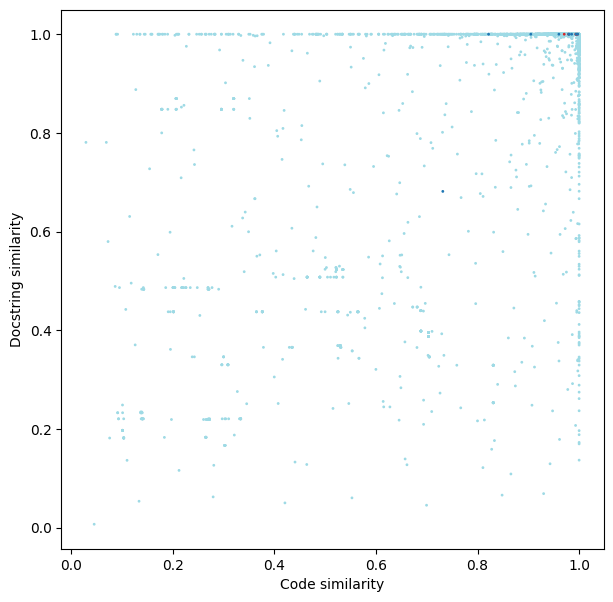

In [29]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(df["code_similarity"], df["docstring_similarity"], c=df["repo_index"], cmap="tab20", s=1)
ax.set_xlabel("Code similarity")
ax.set_ylabel("Docstring similarity")